<a href="https://colab.research.google.com/github/nair9/MachineLearning/blob/main/Decision_Tree_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset conatins data pertaining to evaluating cars according to the following concept:

1.   car_acceptability : if the car is in acceptable condition
2.   buying : buying price of the car
3.   maint : maintenance price of the car
4.   doors : number of doors in the car
5.   persons : capacity of the car in terms of persons it can carry
6.   lug_boot : the size of luggage boot
7.   safety : estimated safety of the car

The features are defined by the following attributes:
1.   buying       : v-high, high, med, low
2.   maint        : v-high, high, med, low
3.   doors        : 2, 3, 4, 5-more
4.   persons      : 2, 4, more
5.   lug_boot     : small, med, big
6.   safety       : low, med, high

Applying Decision Tree Learning Algorithm to classify cars based on the given attributes.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/car.csv")

Mounted at /content/drive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying             1728 non-null   object
 1   maint              1728 non-null   object
 2   doors              1728 non-null   object
 3   persons            1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   car_acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
# Let's assign numerical values to the category data
data['buying'] = data['buying'].map({"high":"3","vhigh":"4","med":"2","low":"1"})
data['maint'] = data['maint'].map({"high":"3","vhigh":"4","med":"2","low":"1"})
data['doors'] = data['doors'].map({"3":"3","4":"4","2":"2","5more":"5"})
data['persons'] = data['persons'].map({"4":"4","2":"2","more":"5"})
data['lug_boot'] = data['lug_boot'].map({"small":"1","med":"2","big":"5"})
data['safety'] = data['safety'].map({"low":"1","med":"2","high":"5"})
data['car_acceptability'] = data['car_acceptability'].map({"unacc":"1","acc":"2","good":"3","vgood":"4"})
data

,buying,maint,doors,persons,lug_boot,safety,car_acceptability
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,5,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,3
1724,1,1,5,5,2,5,4
1725,1,1,5,5,5,1,1
1726,1,1,5,5,5,2,3


In [ ]:
# Input data and target data are assigned 
X = data.drop(columns=['car_acceptability'])
Y = data['car_acceptability']

In [ ]:
# Features and class of the data are defined
features = X.columns
class_names = ['1','2','3','4']

In [ ]:
# Creating Decision Tree Models
car_model_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 10, max_depth = 6, min_samples_leaf = 10)
car_model_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 10)

In [ ]:
# The models are trained with the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
car_model_entropy = car_model_entropy.fit(X_train, Y_train)
car_model_gini = car_model_gini.fit(X_train, Y_train)
Y_predict_entropy = car_model_entropy.predict(X_test)
Y_predict_gini = car_model_gini.predict(X_test)

In [ ]:
# Function to plot the derived Learning Tree
def tree_plotting(model,features,class_names):
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('Car_Acceptability.png')
    
    return Image(graph.create_png())
    

In [ ]:
# Geenrating Confusion Matrix and Accuracy of the generated tree
def model_evaluation(Y_test,Y_predict):
    c_matrix = confusion_matrix(Y_test, Y_predict)
    print('Printing Confusion Matrix...')
    print(c_matrix)
    print('Accuracy')
    print(accuracy_score(Y_test,Y_predict)*100)
    return

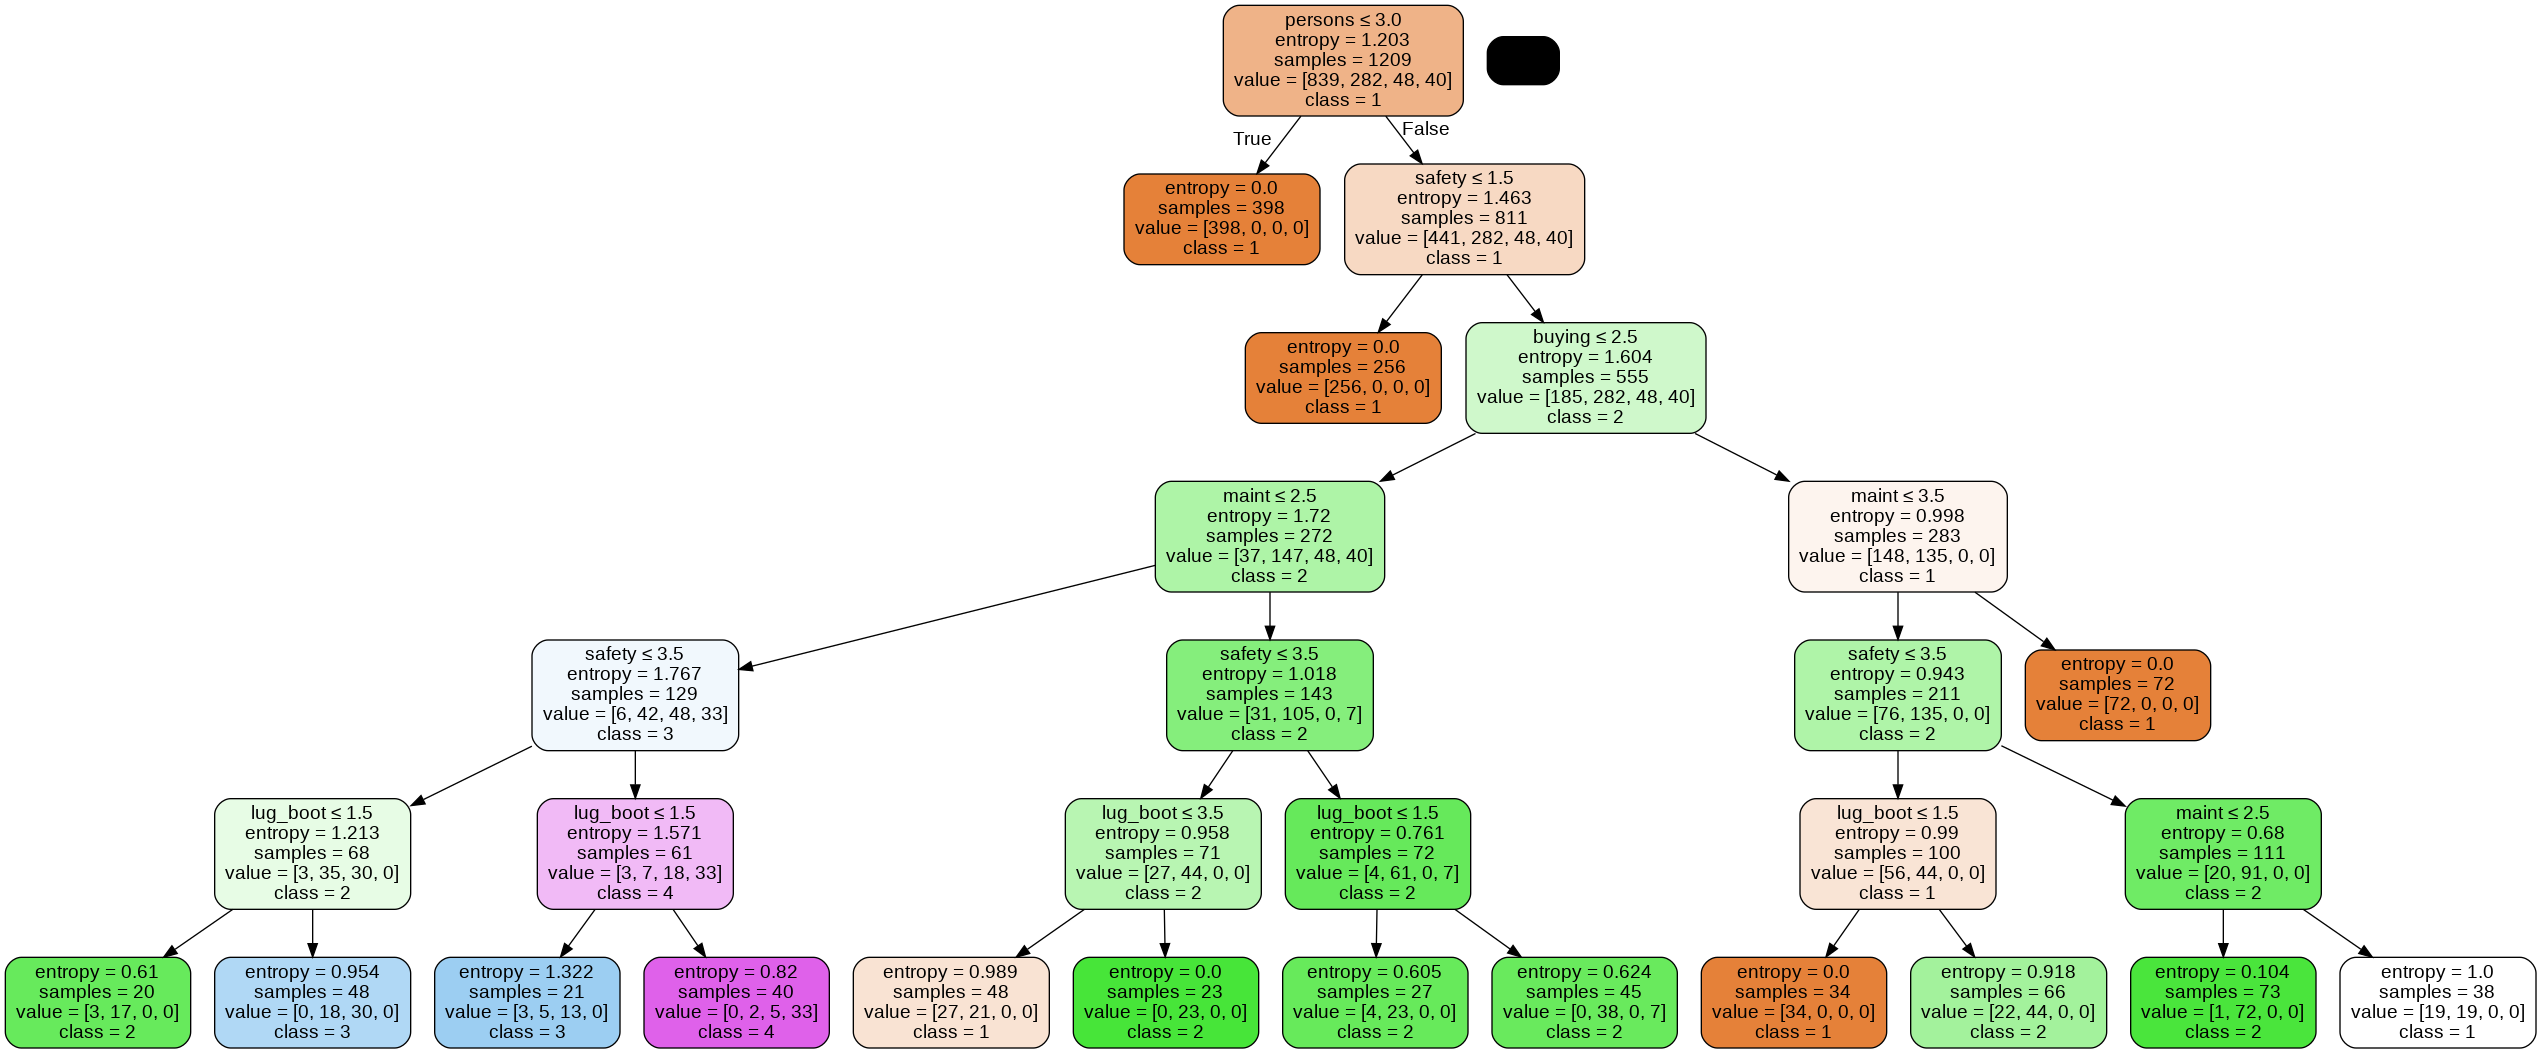

In [ ]:
# Plotting the decision tree generated using entropy
tree_plotting(car_model_entropy,features,class_names)

In [ ]:
# Model evaluation using entropy
model_evaluation(Y_test,Y_predict_entropy)

Printing Confusion Matrix...
[[357  13   1   0]
 [ 13  79   9   1]
 [  0   0  17   4]
 [  0   6   0  19]]
Accuracy
90.94412331406551


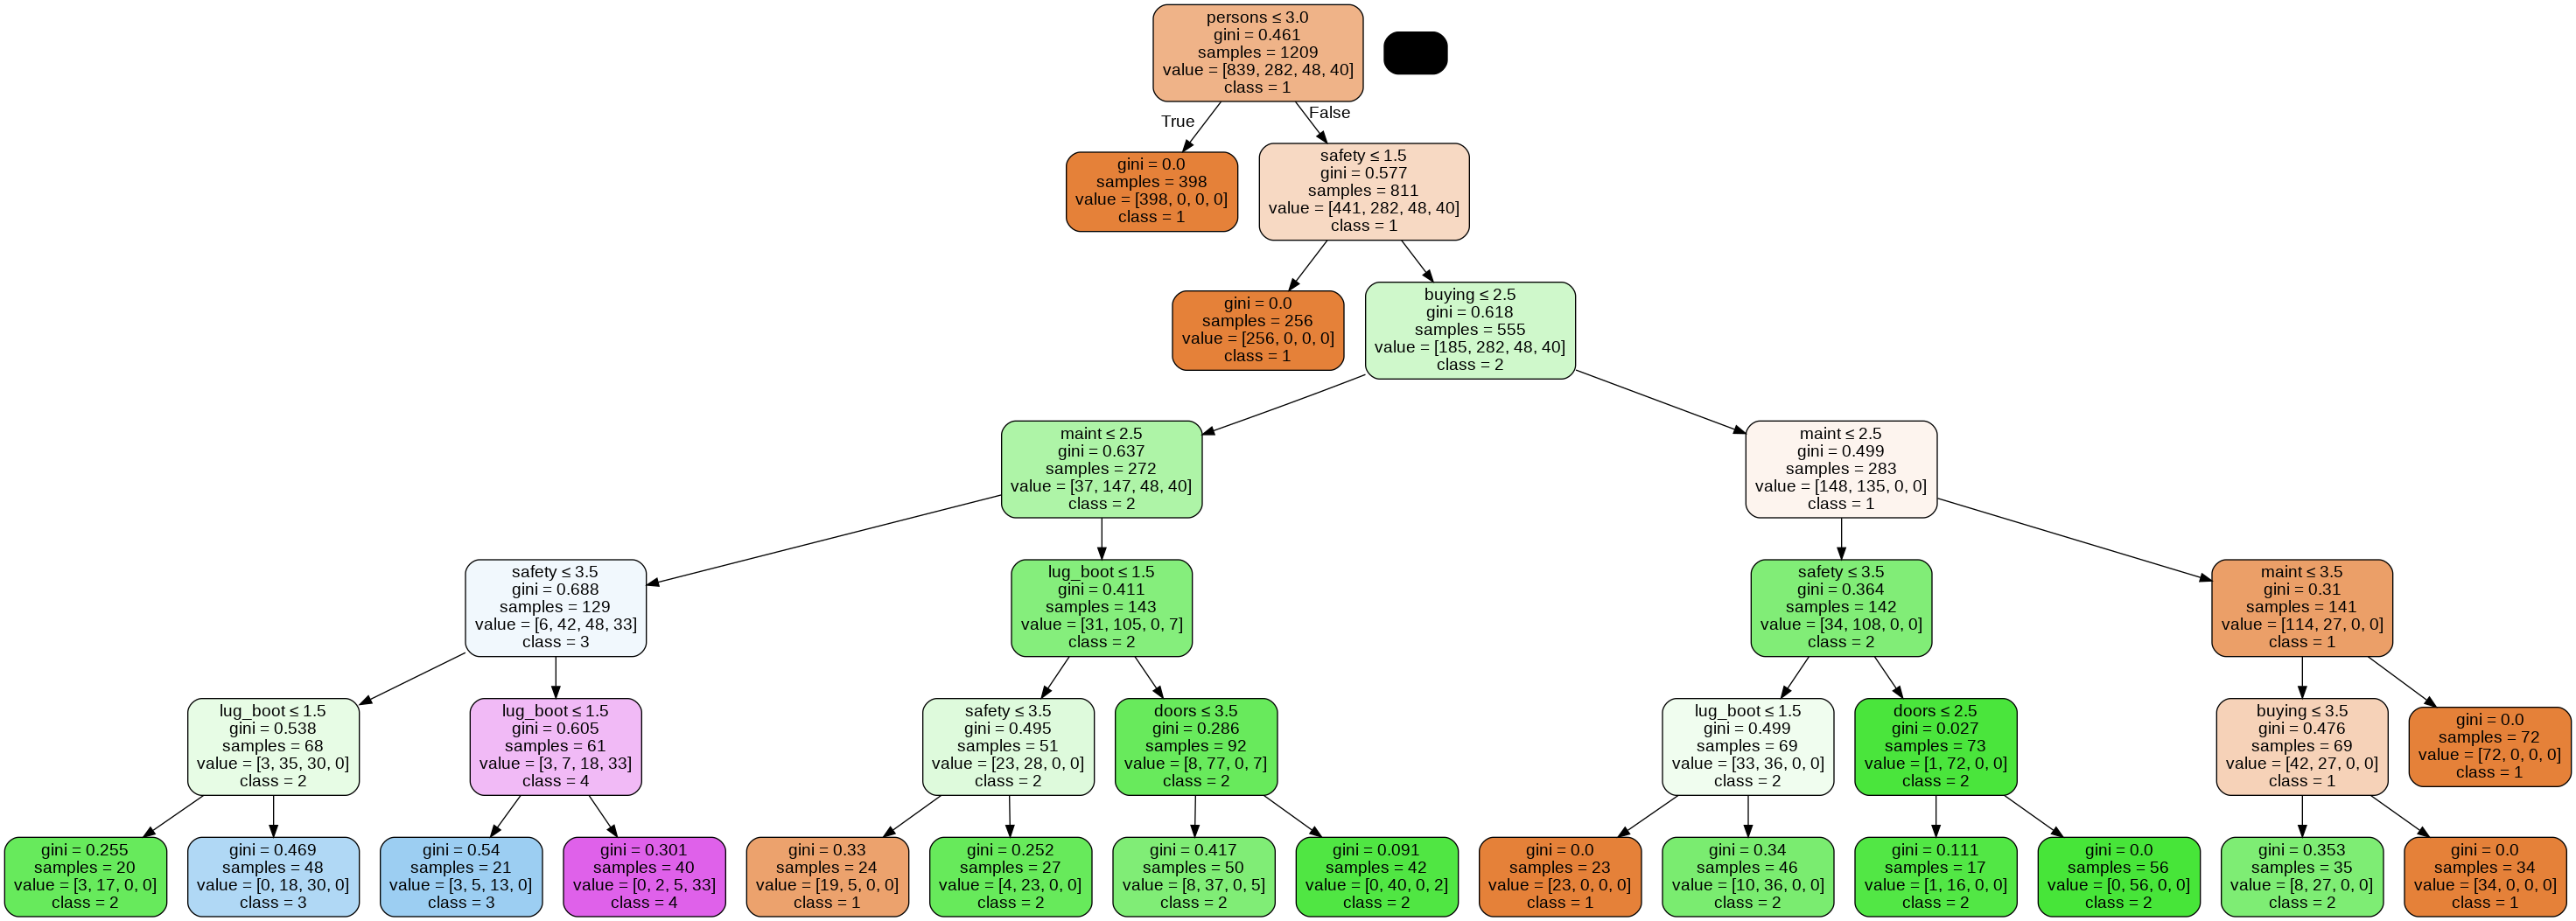

In [ ]:
# Plotting the decision tree generated using gini's index
tree_plotting(car_model_gini,features,class_names)

In [ ]:
# Model evaluation using gini's index
model_evaluation(Y_test,Y_predict_gini)

Printing Confusion Matrix...
[[359  11   1   0]
 [  2  90   9   1]
 [  0   0  17   4]
 [  0   6   0  19]]
Accuracy
93.44894026974951
